# Functions

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from brokenaxes import brokenaxes

In [17]:
#-----------------------------------------#
#             Bulk Spectral               #
#-----------------------------------------#
def plot_emp_evals_bulk(empirical_bulk_distribution, bins, ax):
       bin_centers = (bins[1]-bins[0])/2 + bins[:-1]
       w = (bins[1]-bins[0])
       ax.bar(bin_centers, 
              empirical_bulk_distribution, 
              width=w, 
              color='k', 
              alpha=.3)
       return

def plot_pred_evals_bulk(predicted_bulk_distribution, bins, ax):
       predicted_bulk_distribution[0] = 0
       predicted_bulk_distribution[-1] = 0
       ax.plot(bins, predicted_bulk_distribution, 'k')       
       return

def plot_emp_evals_isolated(emp_bnd, emp_lam, bar_width, bar_height, ax):
       w = bar_width
       h = bar_height
       ax.bar(emp_bnd, height=h, width=w, color=colors[0])
       ax.annotate(f'$\\lambda_b$',
                     xy=(emp_bnd, h),
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     color=colors[0])
       labels = ['$\\lambda_2$', '$\\lambda_1$']
       for i, lam in enumerate(emp_lam[2:]):
              ax.bar(lam, height=h, width=w, color=colors[i+1])
              ax.annotate(labels[i],
                            xy=(lam, h),
                            ha='center',
                            va='bottom',
                            fontsize=8,
                            color=colors[i+1])
       # idx = 0
       # for i, lam in enumerate(emp_lam):
       #        if abs(lam - emp_bnd) > 1:
       #               ax.bar(lam, height=h, width=w, color=colors[idx+1])
       #               ax.annotate(labels[idx],
       #                             xy=(lam, h),
       #                             ha='center',
       #                             va='bottom',
       #                             fontsize=8,
       #                             color=colors[idx+1])
       #               idx += 1
       return

def plot_pred_eval_isolated(predicted_boundary, predicted_lambdas, ax):
       ax.plot(predicted_boundary, .1, '+', color='r')
       for i in range(len(predicted_lambdas)):
              ax.plot(predicted_lambdas[i], .1, '+', color=colors[i])
       return

def plot_shading_evals(emp_bndry, emp_lambdas, ax):
       lam_1 = emp_lambdas[np.argmax(abs(emp_lambdas-emp_bndry>1))]
       ax.axvspan(lam_1, emp_bndry, color='g', alpha=.3)
       return



#-----------------------------------------#
#             Eigenvalues                 #
#-----------------------------------------#
def plot_emp_evals_vs_size(sizes, all_emp_bndry, all_emp_lambdas, ax):
       ax.plot(sizes, all_emp_bndry, 'x', color='r', label=f'$\\lambda_b$')
       labels = ['$\\lambda_2$', '$\\lambda_1$']
       colors = ['m', 'b']
       for i, lam in enumerate(all_emp_lambdas.T):
               ax.plot(sizes, lam, 'x', color=colors[i], label=labels[i])

def plot_pred_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.plot(sizes, all_pred_bndry, color='r')
       colors = ['m', 'b']
       for i, lam in enumerate(all_pred_lambdas.T):
              ax.plot(sizes, lam, color=colors[i])

def plot_shading_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.fill_between(sizes, all_pred_bndry, all_pred_lambdas[:,0], color='g', alpha=.3)


#-----------------------------------------#
#             Eigenvectors                #
#-----------------------------------------#

def plot_emp_evecs(emp_bndry, emp_lambdas, emp_evecs, ax, alpha):
       idx = 1
       labels = [r'$u^{(3)}$', r'$u^{(2)}$', r'$u^{(1)}$']
       for i, lam in enumerate(emp_lambdas):
              if abs(lam)-emp_bndry > 1:
                     vec = emp_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, 'x', color=colors[idx+1], alpha=alpha, label=labels[idx])
                     idx += 1

def plot_pred_evecs(pred_bndry, pred_lambdas, pred_evecs, ax):
       idx = 1
       for i, lam in enumerate(pred_lambdas):
              if abs(lam)-pred_bndry > .1:
                     vec = pred_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, color=colors[idx+1], alpha=1)
                     idx += 1      



#-----------------------------------------#
#             Inner Products              #
#-----------------------------------------#

def plot_emp_ips(sizes, all_emp_ips, ax, color):
       ax.plot(sizes, all_emp_ips, 'x', label='Emperical', color=color)

def plot_pred_ips(sizes, all_pred_ips, ax, color):
       ax.plot(sizes, all_pred_ips, label='Predicted', color=color)

#-----------------------------------------#
#             Loading Data               #
#-----------------------------------------#

def load_emp_spectra_bulk(filepath, filename):
       emp_blk_spct = np.load(filepath + filename + f'_emp_blk_spct.npy')
       emp_blk_bins = np.load(filepath + filename + f'_emp_blk_bins.npy')
       return emp_blk_spct, emp_blk_bins

def load_emp_spectra_isolated(filepath, filename):
       emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
       emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
       emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
       return emp_bndry, emp_lambdas, emp_evecs


def load_pred_spectra_bulk(filepath, filename): 
       pred_blk_spct = np.load(filepath + filename + f'_pred_blk_spct.npy')
       return pred_blk_spct


def load_pred_spectra_isolated(filepath, filename):
       pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
       pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
       pred_evecs = np.load(filepath + filename + f'_pred_evecs.npy')
       return pred_bndry, pred_lambdas, pred_evecs

def load_inner_products(filepath, filename):
       emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
       pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
       return emp_ips, pred_ips

def collect_eigenvalues(filepath, sizes, prob_in, prob_out, anom_idx):
       all_emp_bndry = []
       all_emp_lambdas = []
       all_pred_bndry = []
       all_pred_lambdas = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
              emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
              pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
              pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
              all_emp_bndry.append(emp_bndry)
              all_emp_lambdas.append(emp_lambdas[anom_idx:])
              all_pred_bndry.append(pred_bndry)
              all_pred_lambdas.append(pred_lambdas[anom_idx:])
       all_emp_bndry = np.array(all_emp_bndry)
       all_emp_lambdas = np.array(all_emp_lambdas)
       all_pred_bndry = np.array(all_pred_bndry)
       all_pred_lambdas = np.array(all_pred_lambdas)
       return all_emp_bndry, all_emp_lambdas, all_pred_bndry, all_pred_lambdas


def collect_innerproducts(filepath, sizes, prob_in, prob_out, anom_idx):
       all_emp_ips = []
       all_pred_ips = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
              pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
              all_emp_ips.append(emp_ips)
              all_pred_ips.append(pred_ips)
       all_emp_ips = np.array(all_emp_ips)
       all_pred_ips = np.array(all_pred_ips)
       return all_emp_ips, all_pred_ips

def fix_sign(vec):
       if vec[0] < 0:
              vec = -vec
       if vec[len(vec)//2-5] < 0:
              vec = -vec
       return vec

def get_true_vector(N, K):
    vec = np.zeros(N)
    vec[(N-K)//2:(N+K)//2] = 1/np.sqrt(K)
    return(vec)

def get_performance_metrics(pred_vector, true_vector):
    anom_size = np.count_nonzero(true_vector)
    pred_true = np.argsort(-pred_vector)[:anom_size]
    pred_false = np.argsort(-pred_vector)[anom_size:]
    true_idx = np.argsort(-true_vector)[:anom_size]
    true_positive = np.intersect1d(pred_true, true_idx)
    false_positive = np.setdiff1d(pred_true, true_idx)
    true_negative = np.setdiff1d(pred_false, true_idx)
    false_negative = np.setdiff1d(true_idx, pred_true)
    return true_positive, false_positive, true_negative, false_negative 

def get_roc_rates(pred_vector, true_vector, thresholds):
    tprs = []
    fprs = []
    for threshold in thresholds:
        anom_size = np.count_nonzero(true_vector)
        pred_true = np.argsort(-pred_vector)[:threshold]
        pred_false = np.argsort(-pred_vector)[threshold:]
        true_idx = np.argsort(-true_vector)[:anom_size]
        true_positive = np.intersect1d(pred_true, true_idx)
        false_positive = np.setdiff1d(pred_true, true_idx)
        true_negative = np.setdiff1d(pred_false, true_idx)
        false_negative = np.setdiff1d(true_idx, pred_true)
        true_positive_rate = len(true_positive) / (len(true_positive) + len(false_negative))
        false_positive_rate = len(false_positive) / (len(false_positive) + len(true_negative))    
        tprs.append(true_positive_rate)
        fprs.append(false_positive_rate)
    return tprs, fprs

# Figure 4 - Left

Emperical Inner Products
 [[4.04993082e-05 1.26242964e-04 1.36040246e-04 9.96825499e-01]
 [5.52984629e-05 1.65380857e-04 2.47738792e-03 9.96863880e-01]
 [4.40237122e-04 1.04301103e-03 7.09822905e-04 9.96977097e-01]
 [2.96449572e-05 1.55617150e-05 2.20908013e-02 9.96920841e-01]
 [8.53736961e-05 9.66537072e-05 3.02958718e-02 9.96872651e-01]
 [2.02933223e-04 7.64485059e-06 2.46955558e-01 9.96797047e-01]
 [6.60850034e-07 5.09034077e-05 3.71650852e-01 9.96798847e-01]
 [1.63410692e-04 3.01962703e-05 4.31402361e-01 9.96834481e-01]
 [5.87320072e-05 3.48479485e-04 5.25124392e-01 9.96751689e-01]
 [4.23915310e-07 4.80024414e-06 5.88721894e-01 9.96781765e-01]
 [2.34934876e-05 3.12097139e-06 6.40815606e-01 9.96845315e-01]
 [1.51502672e-06 1.86679627e-04 6.90782747e-01 9.96781049e-01]
 [4.99491915e-04 7.65312442e-05 7.22023426e-01 9.96953345e-01]
 [3.31176209e-06 2.12329650e-05 7.53993120e-01 9.96892437e-01]
 [8.09722447e-06 2.56290663e-04 7.73346129e-01 9.96856807e-01]
 [7.95188839e-05 1.15316425e-

(-0.1, 1.15)

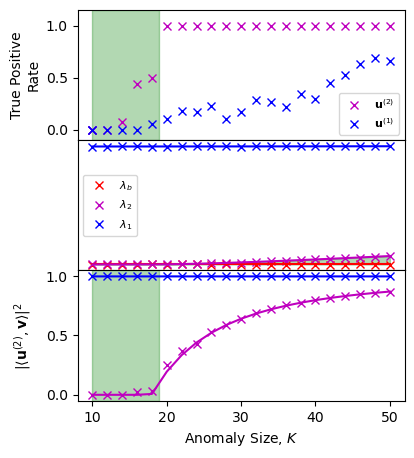

In [18]:
mat_type = 'A'
anom_idx = -2
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1
filepath = '../data/' + str(N)

anom_sizes = np.linspace(10, 50, 21, dtype=int)

fig, ax = plt.subplots(3,1, figsize=(4,4.5), sharex=True)
fig.tight_layout()
fig.subplots_adjust(hspace=0)


# ---------------------------
# Plot Lambdas (Full y-axis)
# ---------------------------
axis=ax[1]
all_emp_bndry, all_emp_lambdas, all_pred_bndry, all_pred_lambdas = collect_eigenvalues(filepath, anom_sizes, prob_in, prob_out, anom_idx)
plot_emp_evals_vs_size(anom_sizes, all_emp_bndry, all_emp_lambdas, axis)
plot_pred_evals_vs_size(anom_sizes, all_pred_bndry, all_pred_lambdas, axis)
plot_shading_evals_vs_size(anom_sizes, all_pred_bndry, all_pred_lambdas, axis)
axis.legend(fontsize=8, loc='center left')
axis.set_yticks([])
# axis.set_ylabel(f'Eigenvalue, $\\lambda_i$')


# ---------------------------
# Plot Inner Products
# ---------------------------
axis=ax[2]
all_emp_ips, all_pred_ips = collect_innerproducts(filepath, anom_sizes, prob_in, prob_out, anom_idx)
print('Emperical Inner Products\n', all_emp_ips)
print('Predicted Inner Products\n', all_pred_ips)
axis.set_xlabel(f'Anomaly Size, $K$')
axis.set_ylabel(r'$|\langle \mathbf{u}^{(2)}, \mathbf{v} \rangle |^2$', labelpad=9)
plot_emp_ips(anom_sizes, all_emp_ips[:,anom_idx], axis,'m')
plot_pred_ips(anom_sizes, all_pred_ips[:,anom_idx], axis,'m')
plot_emp_ips(anom_sizes, all_emp_ips[:,-1], axis,'b')
plot_pred_ips(anom_sizes, all_pred_ips[:,-1], axis,'b')
axis.axvspan(10,19, color='g', alpha=.3)


# ---------------------------
# Plot True Positive Rates
# ---------------------------
axis=ax[0]
axis.axvspan(10,19, color='g', alpha=.3)
for K in anom_sizes:
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
    pred_vec = fix_sign(emp_evecs[:, anom_idx])
    true_vec = get_true_vector(N,K)
    tpr, fpr = get_roc_rates(pred_vec, true_vec, [K])
    axis.plot(K, tpr, 'x', c='m')

mat_type = 'A'
anom_idx = -1
for K in anom_sizes:
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
    pred_vec = fix_sign(emp_evecs[:, anom_idx])
    true_vec = get_true_vector(N,K)
    tpr, fpr = get_roc_rates(pred_vec, true_vec, [K])
    axis.plot(K, tpr, 'x', c='b')

axis.plot(10,0,'x',c='m',label=r'$\mathbf{u}^{(2)}$')
axis.plot(10,0,'x',c='b',label=r'$\mathbf{u}^{(1)}$')
axis.set_xlabel(f'Anomaly Size, $K$')
axis.set_ylabel('True Positive\nRate')
axis.legend(fontsize=8,loc='lower right')
axis.set_ylim(-0.1, 1.15)

# ---------------------------
# Save
# ---------------------------
# plt.savefig('../figures/raw/fig3_left.pdf', bbox_inches='tight')

Text(0, 0.5, 'Eigenvalue, $\\lambda_i$')

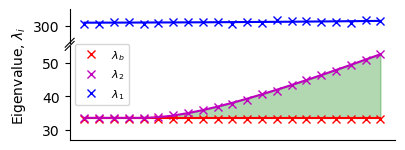

In [19]:
# ---------------------------
# Plot Lambdas (Broken Y-axis)
# ---------------------------
mat_type = 'A'
anom_idx = -2
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1
filepath = '../data/' + str(N)

anom_sizes = np.linspace(10, 50, 21, dtype=int)

fig = plt.figure(figsize=(4.2,1.7))
fig.tight_layout()
fig.subplots_adjust(hspace=0)
bax = brokenaxes(ylims=((27,55), (295,305)), hspace=.05)
all_emp_bndry, all_emp_lambdas, all_pred_bndry, all_pred_lambdas = collect_eigenvalues(filepath, anom_sizes, prob_in, prob_out, anom_idx)
plot_emp_evals_vs_size(anom_sizes, all_emp_bndry, all_emp_lambdas, bax)
plot_pred_evals_vs_size(anom_sizes, all_pred_bndry, all_pred_lambdas, bax)
plot_shading_evals_vs_size(anom_sizes, all_pred_bndry, all_pred_lambdas, bax)
# bax.set_xticks([])
# bax.set_yticks([35,40,45])
for ax in bax.axs:
    ax.set_xticks([])
    ax.set_xticklabels([])
bax.legend(fontsize=8, loc='center left')
bax.set_ylabel('Eigenvalue, $\\lambda_i$')

# ---------------------------
# Save
# ---------------------------
# fig.savefig('../figures/raw/fig3_brokenaxis.pdf', bbox_inches='tight')


# Figure 4 - Right

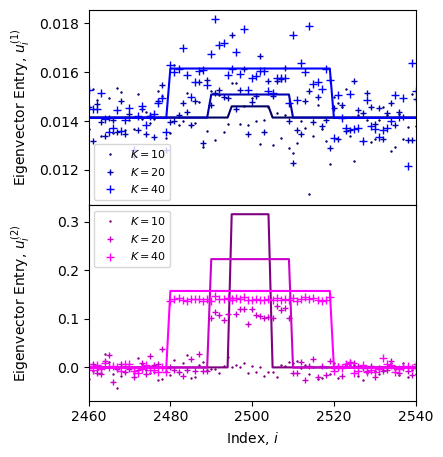

In [20]:
mat_type = 'A'
anom_idx = -2
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1
filepath = '../data/' + str(N)

anom_sizes = [10, 18, 32]

fig, ax = plt.subplots(2,1, figsize=(4,4.5), sharex=True)
fig.tight_layout()
fig.subplots_adjust(hspace=0)
markersizes = [2, 4, 6]
markers = ['+', 'x', '']

# ---------------------------
# Plot Eigenvectors u^(2)
# ---------------------------
for j, K in enumerate([10,20,40]):
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + '_emp_evecs.npy')
    pred_evecs = np.load(filepath + filename + '_pred_evecs.npy')
    
    axis = ax[0]
    colors = [(0, 0, 0.4), (0, 0, 0.7), (0, 0, 1)]
    emp_vec = fix_sign(emp_evecs[:,-1])
    pred_vec = fix_sign(pred_evecs[:,-1])
    axis.plot(emp_vec,
               marker=markers[0],
               linestyle='',
               alpha=1,
               c=colors[j],
               markersize=markersizes[j],
               label=f'$K={K}$')
    axis.plot(pred_vec, c=colors[j])
    axis.legend(fontsize=8, loc='lower left')
    axis.set_xlabel(r'Index, $i$')
    axis.set_ylabel(r'Eigenvector Entry, $u^{(1)}_i$')


# ---------------------------
# Plot Eigenvectors u^(1)
# ---------------------------
for j, K in enumerate([10,20,40]):
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + '_emp_evecs.npy')
    pred_evecs = np.load(filepath + filename + '_pred_evecs.npy')
    
    axis = ax[1]
    axis.set_xlim(2460, 2540)
    colors = [(.5, 0, .5), (.8, 0, .8), (1, 0, 1)]
    emp_vec = fix_sign(emp_evecs[:,-2])
    pred_vec = fix_sign(pred_evecs[:,-2])
    axis.plot(emp_vec,
               marker=markers[0],
               linestyle='',
               alpha=1,
               c=colors[j],
               markersize=markersizes[j],
               label=f'$K={K}$')
    axis.plot(pred_vec, c=colors[j])
    axis.legend(fontsize=8, loc='upper left')
    axis.set_ylabel(r'Eigenvector Entry, $u^{(2)}_i$', labelpad=17)
    axis.set_xlabel(r'Index, $i$')


# ---------------------------
# Save
# ---------------------------
# fig.savefig('../figures/raw/fig3_right.pdf', bbox_inches='tight')